In [1]:
"""
We perform the EDA here based on the early assumptions
EDA includes:
Cleaning the data
Splitting the data
Model the data
Check for better accuracy
"""
import numpy as np
import pandas as pd
import seaborn as sns
import featuretools as ft
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [2]:
# For plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

After understaning the problem statement , we would now move on to hypothesis generation.

<h4>Hypothesis Generation </h4>

Below are some of the factors which we think can affect Loan Approval: 
    <ol>
    <li> Salary: Applicants with higher income have more chances of loan approval.</li>
    <li> Previous History: Applicants who have repayed their earlier debts have greater changes of loan approval .</li>
    <li> Loan Amount: If the loan amount is less , then the chances of loan approval is high. </li>
    <li> Loan Term: Loan for less time period and less amount should have higher chances of approval . </li>
    <li> EMI: Lesser the amount to be paid monthly to repay the loan , higher chances of approval . </li>

 Now, we are going to upload or read the files/data-sets using pandas. For this we used read_csv.

In [4]:
df = pd.read_csv("train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


To determine the accuracy of our model after training it, we will test on the unseen data called as test data and thus using the function as given below we have split our dataset into train and test.

In [352]:
train,test = train_test_split(df, test_size =0.2)

Thus, using the function above we have successfully divided our dataset. 80% of the total set is train and rest 20% is the test data

In [353]:
train.head()
train.shape

(491, 13)

In [354]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,480.000000,479.000000,449.000000
mean,5446.816701,1594.796171,147.137500,342.212944,0.844098
std,6559.236172,2599.551453,87.475101,64.895511,0.363167
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2874.000000,0.000000,100.000000,360.000000,1.000000
50%,3762.000000,1131.000000,128.000000,360.000000,1.000000
75%,5790.000000,2279.000000,168.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [355]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
85,LP001279,Male,No,0,Graduate,No,2366,2531.0,136.0,360.0,1.0,Semiurban,Y
526,LP002705,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
57,LP001197,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,N


In [356]:
test.shape

(123, 13)

In [357]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
385,LP002237,Male,No,1,Graduate,NaN,3667,0.0,113.0,180.0,1.0,Urban,Y
383,LP002234,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N


In this section we will do univariate analysis. It is the simplest form of analysing data, where we examine each variable individually .

<h3>Univariate Analysis</h3>

We are visulaising different types of variables :
<ol>
    <li>Categorical Features</li>
    <li>Ordinal Features</li>
    <li>Numerical Features</li>
</ol>

In [358]:
train['Loan_Status'].value_counts()

Y    343
N    148
Name: Loan_Status, dtype: int64

In [359]:
gender_count = train['Gender'].value_counts()

In [360]:
train['Married'].value_counts()

Yes    324
No     166
Name: Married, dtype: int64

In [361]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [362]:
edu_count = train['Education'].value_counts()
print(edu_count)

Graduate        382
Not Graduate    109
Name: Education, dtype: int64


In [363]:
self_count = train['Self_Employed'].value_counts()
print(self_count)

No     401
Yes     67
Name: Self_Employed, dtype: int64


In [364]:
credit_count = train['Credit_History'].value_counts()
print(credit_count)

1.0    379
0.0     70
Name: Credit_History, dtype: int64


In [365]:
prop_count = train['Property_Area'].value_counts()
print(prop_count)

Semiurban    191
Urban        164
Rural        136
Name: Property_Area, dtype: int64


<h4>Categorical Features</h4>

Text(0.5, 1.0, 'Gender')

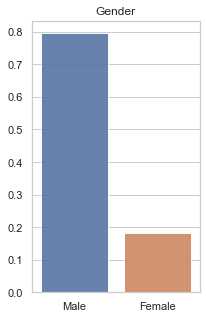

In [366]:
plt.figure(figsize=(3,5))
sns.barplot(gender_count.index, gender_count.values/491, alpha=0.9 )
plt.title('Gender')

Text(0.5, 1.0, 'Married')

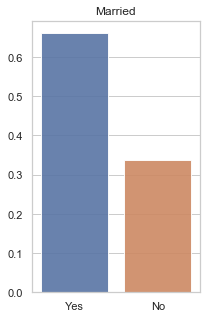

In [367]:
plt.figure(figsize=(3,5))
sns.barplot(train['Married'].value_counts().index, train['Married'].value_counts().values/491, alpha=0.9 )
plt.title('Married')

Text(0.5, 1.0, 'Self Employed')

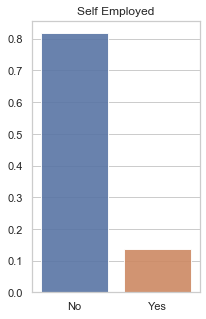

In [368]:
plt.figure(figsize=(3,5))
sns.barplot(self_count.index, self_count.values/491, alpha=0.9 )
plt.title('Self Employed')

Text(0.5, 1.0, 'Credit History')

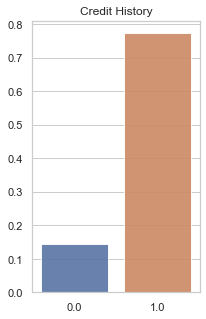

In [369]:
plt.figure(figsize=(3,5))
sns.barplot(credit_count.index, credit_count.values/491, alpha=0.9 )
plt.title('Credit History')

Text(0.5, 1.0, 'Loan Status')

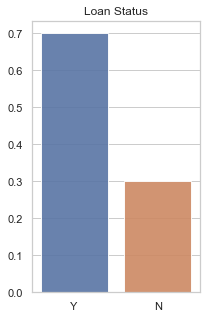

In [370]:
plt.figure(figsize=(3,5))
sns.barplot(train['Loan_Status'].value_counts().index, train['Loan_Status'].value_counts().values/491, alpha=0.9 )
plt.title('Loan Status')

As we can see, our data is <strong>imbalanced</strong> since there 70-30 distribution between approved and unapproved applicants.

<h4>Ordinal Feaures </h4>

Text(0.5, 1.0, 'Dependents')

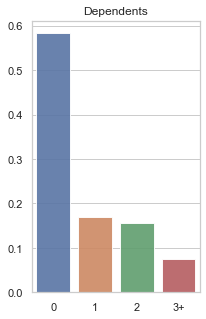

In [371]:
plt.figure(figsize=(3,5))
sns.barplot(train['Dependents'].value_counts().index, train['Dependents'].value_counts().values/491, alpha=0.9 )
plt.title('Dependents')

Text(0.5, 1.0, 'Education')

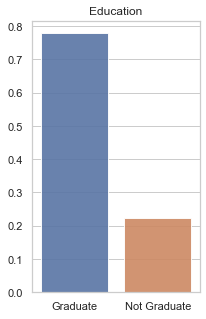

In [372]:
plt.figure(figsize=(3,5))
sns.barplot(edu_count.index, edu_count.values/491, alpha=0.9 )
plt.title('Education')

Text(0.5, 1.0, 'Property Area')

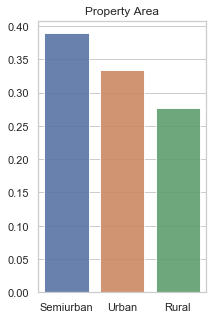

In [373]:
plt.figure(figsize=(3,5))
sns.barplot(prop_count.index, prop_count.values/491, alpha=0.9 )
plt.title('Property Area')

<h5> Here we will pause for conclusions from the data we plotted:</h5>

<ol>
<li>Firstly, we can see that almost 70% of the applicants had their loan applications accepted.</li>
<li>Most of the applicants have a good credit history.</li>
<li>Very few who are self employed have applied for the loan.</li>
<li>There is a large gender gap in the applied loan applicants. Most of them are male.</li>
<li>Almost 65% of the applicants are Married.</li>
<li>Less than 10% of the applicants have 3+ dependents.</li>
<li>Graduates make up almost 78% of the applicants.</li>
</ol>

As our main target is Loan Status Variable, we will try to find if Applicant income can exactly separate the Loan Status.
Suppose if we can find that if applicant income is above some X amount then Loan Status is yes .Else it is No. Firstly I am trying to plot the distribution plot based on Loan Status.

<h4>Numerical Features </h4>

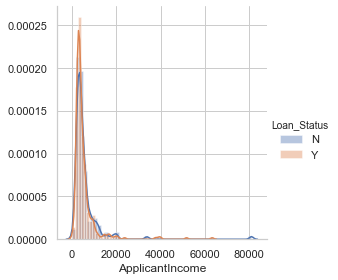

In [374]:
sns.set_style=("whitegrid")
sns.FacetGrid(train,hue="Loan_Status",size=4).map(sns.distplot,"ApplicantIncome").add_legend();
plt.show()

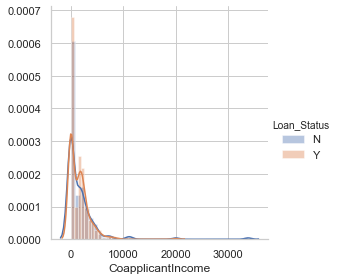

In [375]:
sns.set_style=("whitegrid")
sns.FacetGrid(train,hue="Loan_Status",size=4).map(sns.distplot,"CoapplicantIncome").add_legend();
plt.show()

Unfortunately we cannot segregate based on Applicant Income alone. The same is the case with Co-applicant Income as shown in the graph plotted above. We try a different approach and do a scatter plot. Also, the distribution of both the graphs is not normal, we would try to make these distributions normal in the later section so that the algorithm can fit better.
We try a different approach and do a scatter plot.

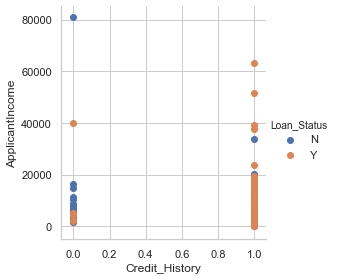

In [376]:
sns.set_style=("whitegrid")
sns.FacetGrid(train,hue="Loan_Status",size=4).map(plt.scatter,"Credit_History","ApplicantIncome").add_legend();
plt.show()

After observing the graph above we can say that the people having credit history as zero and with an income of less than
20,000 can be segregated as NO. Although this is not very accurate.

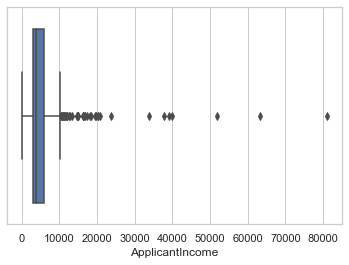

In [377]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["ApplicantIncome"])

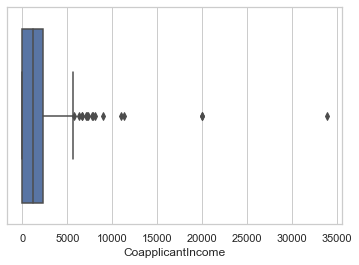

In [378]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["CoapplicantIncome"])

It can be inferred from the above two graphs that most of the data in the distribution of applicant income and Coapplicant Income is towards the left which means it is not normally distributed and the box plot confirms the presence of a lot of outliers which can be attributed to income disparity in the society.

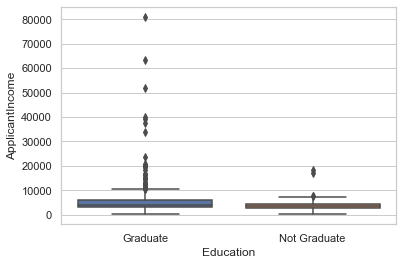

In [379]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="Education", y="ApplicantIncome", data=train)


We can see that there are graduates with very high incomes are outliers which would be taken care of later.

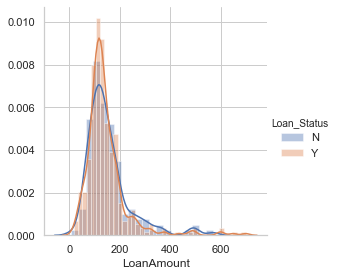

In [380]:
sns.set_style=("whitegrid")
sns.FacetGrid(train,hue="Loan_Status",size=4).map(sns.distplot,"LoanAmount").add_legend();
plt.show()

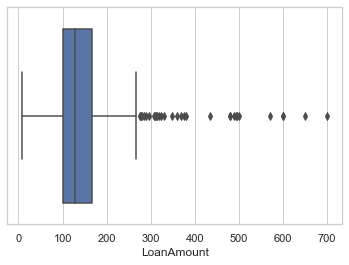

In [381]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["LoanAmount"])

We observe a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in the next section.


<h6>Now we would like to know how well each feature correlate with Loan Status, therefore we would look at the bivariate analysis.</h6>

<h3>Bivariate Analysis</h3>

<h6>Categorical Independent variable VS target Variable </h6>

In [382]:
ct=pd.crosstab(train.Married, train.Loan_Status)
print(ct)

Loan_Status   N    Y
Married             
No           61  105
Yes          87  237


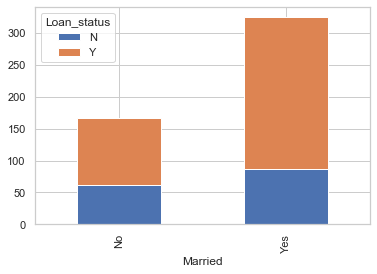

In [383]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Married = np.random.choice(['Yes','No', ], n)
ct.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

We can infer that percentage of married people who have got their loan approved is higher when compared to non- married people.

In [384]:
ct1=pd.crosstab(train.Dependents,train.Loan_Status)

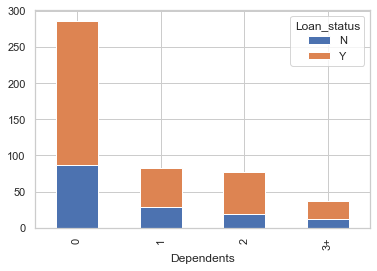

In [385]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Dependents= np.random.choice(['0','1', '2','3+'], n)
ct1.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.

In [386]:
ct2=pd.crosstab(train.Education,train.Loan_Status)
print(ct2)

Loan_Status     N    Y
Education             
Graduate      108  274
Not Graduate   40   69


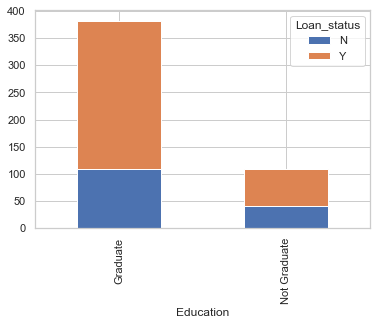

In [387]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Education= np.random.choice(['Yes','No'], n)
ct2.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

The percentage of applicants who are graduates have got their loan approved rather than the one who are not graduates.

In [388]:
ct3=pd.crosstab(train.Self_Employed,train.Loan_Status)
print(ct3)

Loan_Status      N    Y
Self_Employed          
No             121  280
Yes             22   45


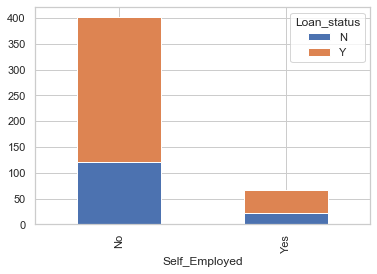

In [389]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Self_Employed= np.random.choice(['Yes','No'], n)
ct3.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

There is hardly any correlation between Loan_Status and Self_Employed applicants.
So in short we can say that it doesn’t matter whether the applicant is self employed or not.

In [390]:
ct4=pd.crosstab(train.Credit_History,train.Loan_Status)
print(ct4)

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             77  302


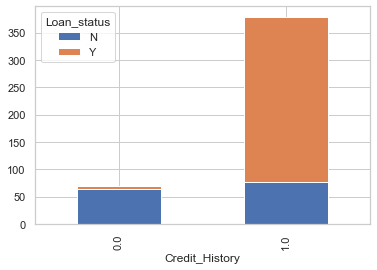

In [391]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Credit_History= np.random.choice(['0.0','1.0'], n)
ct4.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

As observed from the graph above that people with bad credit history are  less likely to get a loan as compared to people
with good credit history.

In [392]:
ct5=pd.crosstab(train.Property_Area,train.Loan_Status)
print(ct5)

Loan_Status     N    Y
Property_Area         
Rural          50   86
Semiurban      45  146
Urban          53  111


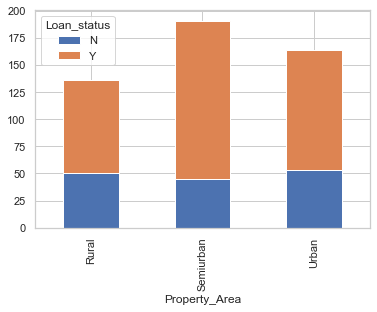

In [393]:
n = 1
Loan_Status = np.random.choice([True,False], n)
Property_Area= np.random.choice(['Rural','Urban','Semiurban'], n)
ct5.plot.bar(stacked=True)
plt.legend(title='Loan_status')

plt.show()

Out of the three plotted above, it can be infered that the people living in Semiurban places have a higher percentage to
to get acquire a loan.

<h6>Numerical Independent variable VS Target Variable </h6>

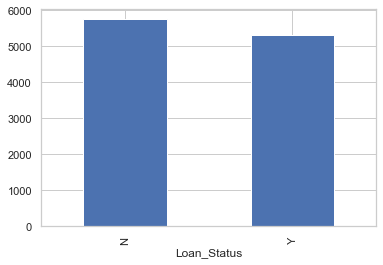

In [394]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y axis shows mean applicant income, no changes in the mean applicant income so we make bins for the applicant income varaiable based on the values in it and analyse the corresponding loan status for each bin.

In [395]:
train.shape

(491, 13)

In [396]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

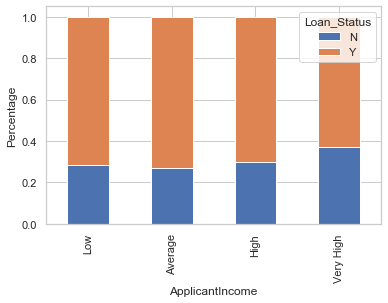

In [397]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

It can be inferred that Applicant Income does not affect the chances of loan approval which contradicts our hypothesis, in which the one with higher applicant income would have higher chance of approval. 

In [398]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

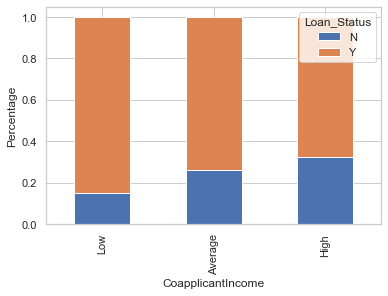

In [399]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome') 
P=plt.ylabel('Percentage')

It shows that if the coapplicant's income is less, then there is a higher chance of loan approval. But this does not look right . The possible explanation can be that not many applicants have a coapplicant , therefore the coapplicant income for them is 0 and hence the loan approval is not dependent on it.So we will make a new variable to see the combined effect on Loan status.

In [400]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

In [401]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

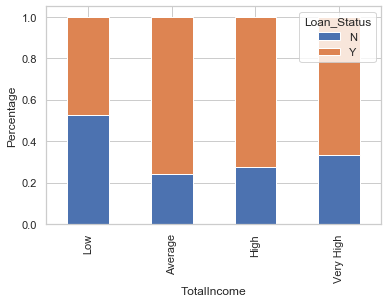

In [402]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('TotalIncome') 
P=plt.ylabel('Percentage')

We can see that the proportion of loans getting approved for Low income is lower than when compared to Average, high and Very High total income.

In [403]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

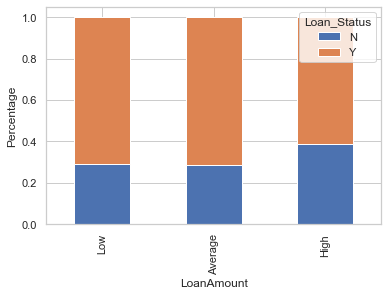

In [404]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount') 
P=plt.ylabel('Percentage')

Proportion of approved loans is higher for low and average Loan Amount as compared to that of High loan amount which supports our our initial hypothesis that approval chance is more for less loan amount. 

Now we will drop the bins we made for the exploration part and move on to the next section of data cleaning .

In [405]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1);

In [406]:
train.shape
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
85,LP001279,Male,No,0,Graduate,No,2366,2531.0,136.0,360.0,1.0,Semiurban,Y
526,LP002705,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
57,LP001197,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,N


With this, we have completed our Bivariate analysis.

<h5>With this we have completed our exploratory data analysis on the training data and now we move on to data cleaning of both the train data and test data.</h5>

<h3>Data Cleaning</h3>

Checking for missing values in train dataset

In [407]:
train.isnull().sum()

Loan_ID               0
Gender               11
Married               1
Dependents            8
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term     12
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

This suggests that in our training dataset we have 12 missing values in Gender, 3 in married and so on.

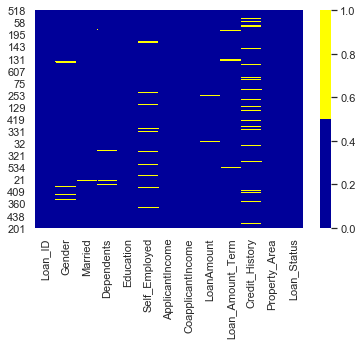

In [408]:
cols = train.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

<h6>We have used a function for heatmap here. The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information. Since we have less number of features here, we have used the heatmap data technique to gain a perspective on null data values.</h6>

Now that we have encountered our problem, there are three solutions which we can implement to counter it:

<ol>
    <li>Drop the observation.</li>
    <li>Drop the feature.</li>
    <li>Impute the missing data.</li>
</ol>

We have implemented the third solution. 

In [409]:
# We observe that we have many missing values in different columns. 
# Now we are going to replace the categorical values by most occuring value
# and numerical values by median. Replacing missing values

train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [410]:
train['LoanAmount'].median()

128.0

In [411]:
train['LoanAmount'].fillna(128, inplace =True)

In [412]:
train['Loan_Amount_Term'].median()

360.0

In [413]:
train['Loan_Amount_Term'].mode()[0]

360.0

The Loan_Amount_Term is a continuous variable here. So instead of directly going with the median here, we would like to get an idea of what data represents by seeing the most occuring value.

But, here we get both the mode and median as 360. So we are choosing 360 to replace which just validates our point. 

In [414]:
train['Loan_Amount_Term'].fillna(360, inplace =True)

In [415]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have successfully imputed all the missing values and now no null values exist in the train dataset.

<h5>Checking for missing  values in test dataset</h5>

In [416]:
test.isnull().sum()

Loan_ID               0
Gender                2
Married               2
Dependents            7
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term      2
Credit_History        8
Property_Area         0
Loan_Status           0
dtype: int64

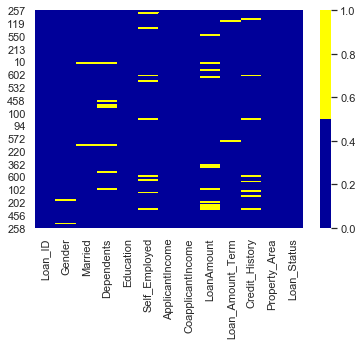

In [417]:
cols = test.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(test[cols].isnull(), cmap=sns.color_palette(colours))

We observe that there are few missing values in test data set and now we will impute the new values , the same way we did for the train dataset above.

In [418]:
# We observe that we havefew missing values in different columns. 
# Now we are going to replace the categorical values by most occuring value
# and numerical values by median. Replacing missing values

test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

In [419]:
test['LoanAmount'].median()

123.0

In [420]:
test['LoanAmount'].fillna(122.5, inplace =True)

In [421]:
test['Loan_Amount_Term'].median()

360.0

In [422]:
test['Loan_Amount_Term'].mode()[0]

360.0

In [423]:
test['Loan_Amount_Term'].fillna(360, inplace =True)

In [424]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h5>Checking for outliers in our data</h5>

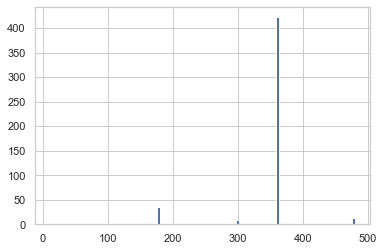

In [425]:
train['Loan_Amount_Term'].hist(bins=100)

For this graph we can consider, a value between 10  to 170  as an outlier .

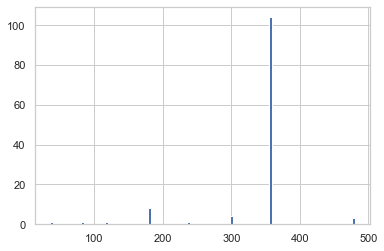

In [426]:
test['Loan_Amount_Term'].hist(bins=100)

For this graph we can consider, a value between 50  to 170  as an outlier .

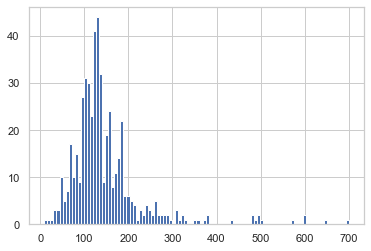

In [427]:
train['LoanAmount'].hist(bins=100)

For this graph we can consider, a value above 600 as an outlier.

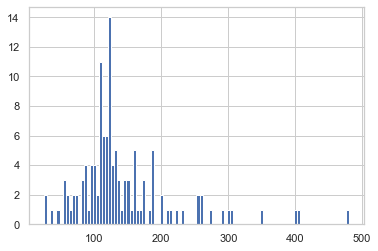

In [428]:
test['LoanAmount'].hist(bins=100)

We have used a histogram plot to observe any outliers if present in the data, as shown in the graphs above, there are  a few outliers.  


The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We are trying to visualize them using log transformation.

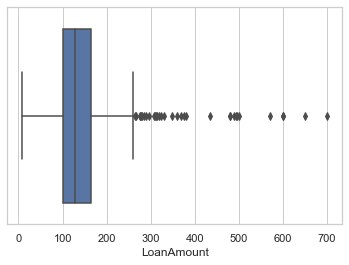

In [429]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["LoanAmount"])

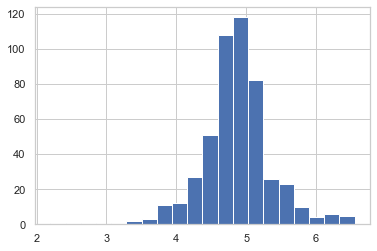

In [430]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins =20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [431]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [432]:
#Check for Unique

In [433]:
train.apply(lambda x: len(x.unique()))

Loan_ID              491
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      415
CoapplicantIncome    245
LoanAmount           184
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
LoanAmount_log       184
dtype: int64

In [434]:
test.apply(lambda x: len(x.unique()))

Loan_ID              123
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      113
CoapplicantIncome     62
LoanAmount            80
Loan_Amount_Term       8
Credit_History         2
Property_Area          3
Loan_Status            2
LoanAmount_log        80
dtype: int64

The Loan_ID should not be same for two records, thus we check whether all the records have their unique Loan_ID variable. Since, we can see Loan_ID value is unique for both test and train, we proceed. 


We can say that our data is cleaned and properly structured, we can move forward with out model building. 

In [435]:
train_1 = train.drop('Loan_ID', axis = 1)
test_1 = test.drop('Loan_ID', axis =1)

In [436]:
X_train = train_1.drop('Loan_Status', 1)
y_train = train_1.Loan_Status

In [437]:
X_test = test_1.drop('Loan_Status', 1)
y_test = test_1.Loan_Status

In [438]:
X_train.shape

(491, 12)

In [439]:
X_test.shape

(123, 12)

In [440]:
y_train.head(10)

518    N
461    Y
85     Y
526    Y
57     N
276    Y
499    N
536    Y
351    N
495    Y
Name: Loan_Status, dtype: object

In [441]:
y_test.head(10)

257    N
7      N
385    Y
383    Y
399    N
444    Y
45     Y
119    Y
488    Y
413    Y
Name: Loan_Status, dtype: object

Since we have a lot of categorical variables which affect Loan Status, we need to convert each of them in to numeric data for modeling.



In [442]:
X_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
518,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,5.220356
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,4.852030
85,Male,No,0,Graduate,No,2366,2531.0,136.0,360.0,1.0,Semiurban,4.912655
526,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,4.700480
57,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,Rural,4.905275


In [443]:
X_train1= pd.get_dummies(X_train)
train_2 = pd.get_dummies(train_1)
test_2 = pd.get_dummies(test_1)
X_test1 = pd.get_dummies(X_test)

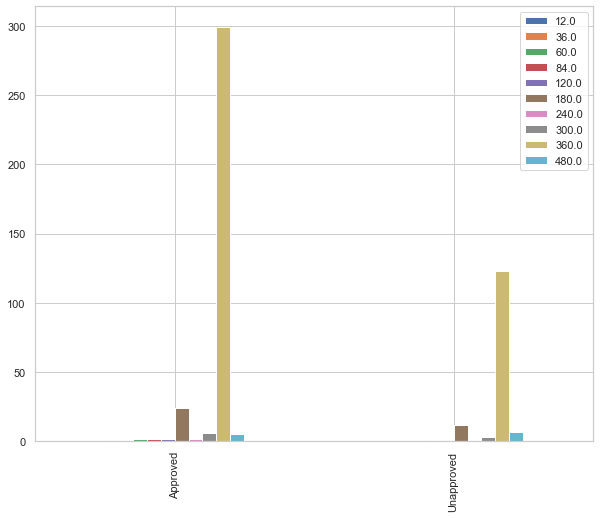

In [444]:
approved_term = train_1[train_1['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = train_1[train_1['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df1 = pd.DataFrame([approved_term,unapproved_term])
df1.index = ['Approved','Unapproved']
df1.plot(kind='bar', figsize=(10,8))

In [445]:
y_train.replace('N', 0,inplace=True)
y_train.replace('Y', 1,inplace=True)

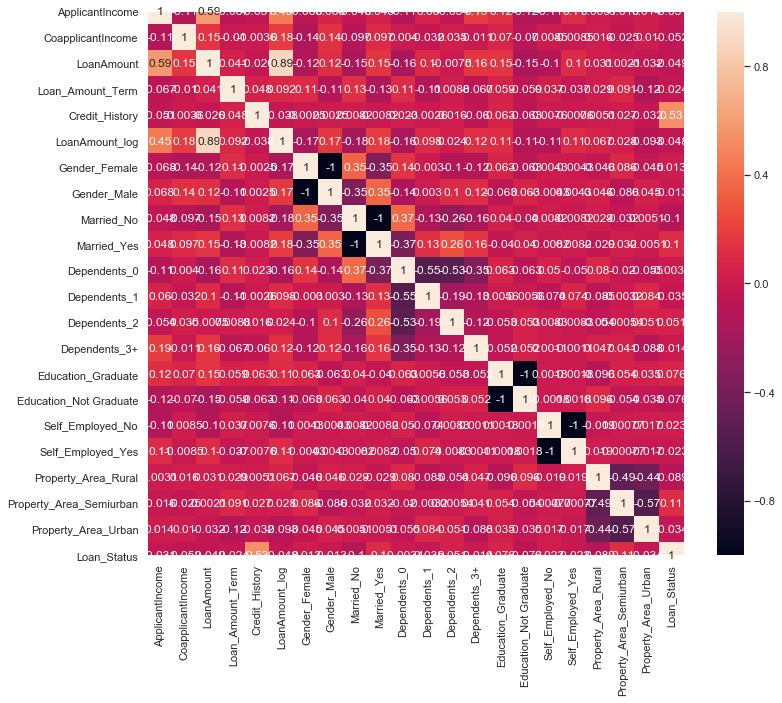

In [446]:
data_corr = pd.concat([X_train1, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True);

In [447]:
data_corr.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
ApplicantIncome,1.000000,-0.113281,0.585871,-0.067269,-0.051006,0.451741,-0.068100,0.068100,-0.047635,0.047635,...,-0.054448,0.187517,0.122944,-0.122944,-0.109289,0.109289,0.003057,-0.016331,0.013981,-0.031148
CoapplicantIncome,-0.113281,1.000000,0.148636,-0.010023,-0.003614,0.182376,-0.139282,0.139282,-0.097144,0.097144,...,0.035225,-0.010959,0.070400,-0.070400,0.008465,-0.008465,0.016060,-0.024558,0.010147,-0.052034
LoanAmount,0.585871,0.148636,1.000000,0.041242,-0.025835,0.892047,-0.118057,0.118057,-0.152182,0.152182,...,-0.007488,0.162868,0.152682,-0.152682,-0.103946,0.103946,0.031199,0.002060,-0.031732,-0.048832
Loan_Amount_Term,-0.067269,-0.010023,0.041242,1.000000,0.047749,0.092285,0.105600,-0.105600,0.131430,-0.131430,...,0.008751,-0.067172,0.059077,-0.059077,0.036789,-0.036789,0.028683,0.090885,-0.121160,-0.024110
Credit_History,-0.051006,-0.003614,-0.025835,0.047749,1.000000,-0.038203,-0.002545,0.002545,0.008201,-0.008201,...,0.015661,-0.060136,0.062519,-0.062519,0.007603,-0.007603,0.005064,0.026647,-0.032349,0.531900
LoanAmount_log,0.451741,0.182376,0.892047,0.092285,-0.038203,1.000000,-0.169106,0.169106,-0.182980,0.182980,...,0.024041,0.121820,0.114666,-0.114666,-0.106644,0.106644,0.067457,0.028202,-0.093156,-0.048137
Gender_Female,-0.068100,-0.139282,-0.118057,0.105600,-0.002545,-0.169106,1.000000,-1.000000,0.351317,-0.351317,...,-0.102982,-0.115304,0.063073,-0.063073,0.004310,-0.004310,-0.046212,0.086268,-0.045325,0.012943
Gender_Male,0.068100,0.139282,0.118057,-0.105600,0.002545,0.169106,-1.000000,1.000000,-0.351317,0.351317,...,0.102982,0.115304,-0.063073,0.063073,-0.004310,0.004310,0.046212,-0.086268,0.045325,-0.012943
Married_No,-0.047635,-0.097144,-0.152182,0.131430,0.008201,-0.182980,0.351317,-0.351317,1.000000,-1.000000,...,-0.260859,-0.155096,0.039898,-0.039898,0.008174,-0.008174,0.029058,-0.031565,0.005057,-0.102861
Married_Yes,0.047635,0.097144,0.152182,-0.131430,-0.008201,0.182980,-0.351317,0.351317,-1.000000,1.000000,...,0.260859,0.155096,-0.039898,0.039898,-0.008174,0.008174,-0.029058,0.031565,-0.005057,0.102861


<h2> Initial Model Building </h2>

In [448]:
y_t = train_1.Loan_Status

In [449]:
train_1['Loan_Status'].replace('N', 0,inplace=True)
train_1['Loan_Status'].replace('Y', 1,inplace=True)

In [450]:
X_train1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
518,4683,1915.0,185.0,360.0,1.0,5.220356,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
461,7740,0.0,128.0,180.0,1.0,4.852030,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
85,2366,2531.0,136.0,360.0,1.0,4.912655,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
526,3775,0.0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
57,3366,2200.0,135.0,360.0,1.0,4.905275,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [451]:
y_t.head()

518    0
461    1
85     1
526    1
57     0
Name: Loan_Status, dtype: int64

In [452]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [453]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("NaiveBayes", GaussianNB()))

In [454]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train1, y_t, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticReg: 0.810449 (0.062871)
KNN: 0.639469 (0.046841)
NaiveBayes: 0.792122 (0.059329)


In [455]:
logreg = LogisticRegression()
logreg.fit(X_train1,y_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [456]:
y_pred = logreg.predict(X_test1)

In [457]:
test_1['Loan_Status'].replace('N', 0,inplace=True)
test_1['Loan_Status'].replace('Y', 1,inplace=True)

In [458]:
y_te = test_1.Loan_Status

In [459]:
#accuracy_score = accuracy_score(y_te, y_pred)
#print(accuracy_score)

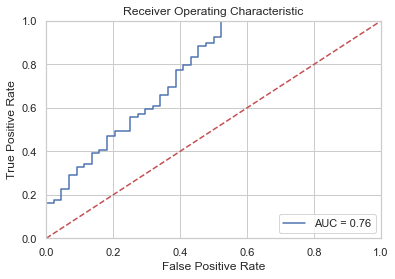

In [460]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [461]:
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[20 24]
 [ 0 79]]


In [462]:
report = classification_report(y_te, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        44
           1       0.77      1.00      0.87        79

    accuracy                           0.80       123
   macro avg       0.88      0.73      0.75       123
weighted avg       0.85      0.80      0.78       123



In [463]:
"""Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
NaiveB = GaussianNB()
NaiveB.fit(X_train1, y_t)
y_pred1 = NaiveB.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_nb = confusion_matrix(y_te, y_pred1)
print(cm_nb)

[[20 24]
 [ 2 77]]


In [464]:
as_nb = accuracy_score(y_te, y_pred1)
print(as_nb)

0.7886178861788617


In [465]:
""" LOGISTIC REGRESSION """
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train1, y_t)
y_pred = classifier.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(y_te, y_pred)
as_logreg=accuracy_score(y_te, y_pred)

""" K-NEAREST NEIGHBORS """
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
classifier.fit(X_train1, y_t)
y_pred = classifier.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_knn = confusion_matrix(y_te, y_pred)
as_knn=accuracy_score(y_te, y_pred)

In [466]:
print(cm_knn)

[[ 4 40]
 [ 4 75]]


In [467]:
print(as_knn)

0.6422764227642277


In [468]:
report = classification_report(y_te, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        44
           1       0.65      0.95      0.77        79

    accuracy                           0.64       123
   macro avg       0.58      0.52      0.46       123
weighted avg       0.60      0.64      0.55       123



In [469]:
print(cm_logreg)

[[20 24]
 [ 0 79]]


In [470]:
print(as_logreg)

0.8048780487804879


Out of all the algorithms mentioned above , the best accuracy observed is with logistic regression after implementing the K-fold technique and the least accuracy is of K-nearest neighbours .

In [471]:
X_train1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
518,4683,1915.0,185.0,360.0,1.0,5.220356,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
461,7740,0.0,128.0,180.0,1.0,4.852030,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
85,2366,2531.0,136.0,360.0,1.0,4.912655,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
526,3775,0.0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
57,3366,2200.0,135.0,360.0,1.0,4.905275,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


<h2>Feature Engineering </h2>

<h4>Getting new Data Columns</h4>

Instead of evaluating the applicant and co-applicant income separately, we combine it into a new column - Total_Income so that we get a better perspective.  

Total_Income = Applicant Income + Co-applicant Income

In [472]:
X_train1['TotalIncome'] = X_train1['ApplicantIncome'] + X_train1['CoapplicantIncome']

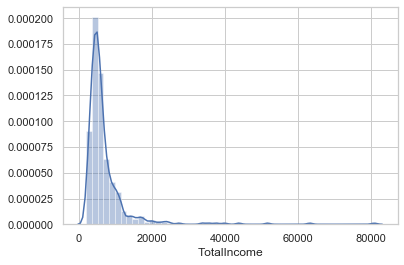

In [473]:
sns.distplot(X_train1['TotalIncome'])

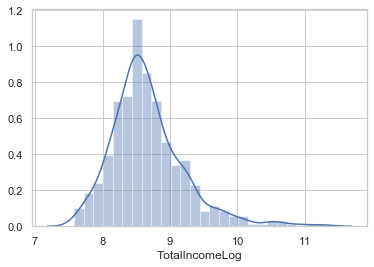

In [474]:
X_train1['TotalIncomeLog'] = np.log(X_train1['TotalIncome'])
sns.distplot(X_train1['TotalIncomeLog'])

In [475]:
X_test1['TotalIncome'] = X_test1['ApplicantIncome'] + X_test1['CoapplicantIncome']
X_test1['TotalIncomeLog'] = np.log(X_test1['TotalIncome'])

In [476]:
X_test1['EMI'] = X_test1['LoanAmount']/ X_test1['Loan_Amount_Term']

In [477]:
X_train1['EMI'] = X_train1['LoanAmount']/ X_train1['Loan_Amount_Term']

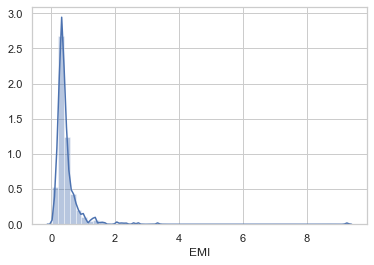

In [478]:
sns.distplot(X_train1['EMI'])

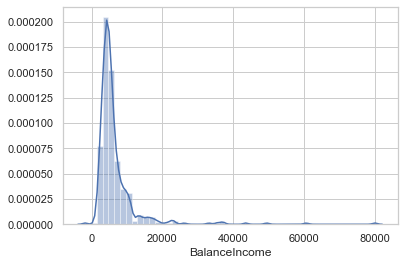

In [479]:
X_train1['BalanceIncome'] = X_train1['TotalIncome'] - (X_train1['EMI']*1000)
sns.distplot(X_train1['BalanceIncome'])

In [480]:
X_test1['BalanceIncome'] = X_test1['TotalIncome'] - (X_test1['EMI']*1000)

In [481]:
X_train1 = X_train1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [482]:
X_train1.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeLog,EMI,BalanceIncome
518,1.0,5.220356,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,6598.0,8.794522,0.513889,6084.111111
461,1.0,4.852030,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,7740.0,8.954157,0.711111,7028.888889
85,1.0,4.912655,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,4897.0,8.496378,0.377778,4519.222222
526,1.0,4.700480,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,3775.0,8.236156,0.305556,3469.444444
57,1.0,4.905275,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,5566.0,8.624432,0.375000,5191.000000


In [483]:
X_test1 = X_test1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [484]:
X_test1.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeLog,EMI,BalanceIncome
257,1.0,4.543295,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,5250.0,8.565983,0.261111,4988.888889
7,0.0,5.062595,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,5540.0,8.619750,0.438889,5101.111111
385,1.0,4.727388,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,3667.0,8.207129,0.627778,3039.222222
383,1.0,4.852030,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,7167.0,8.877242,0.355556,6811.444444
399,0.0,4.634729,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,3300.0,8.101678,0.286111,3013.888889


<h2> Final Model Building </h2>

In [485]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("SVM Gaussian", SVC(kernel = 'rbf', class_weight='balanced',random_state = 0)))
#classifier.append(("SVM No Kernel", SVC(kernel = 'linear', random_state = 0)))
classifier.append(("Decision Tree", DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
classifier.append(("Random Forest", RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)))

In [486]:
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train1, y_t, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticReg: 0.812531 (0.055604)
KNN: 0.635388 (0.053068)
NaiveBayes: 0.800245 (0.058627)
SVM Gaussian: 0.692367 (0.055536)
Decision Tree: 0.720816 (0.052277)
Random Forest: 0.779878 (0.051094)


In [487]:
""" LOGISTIC REGRESSION """
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', random_state = 13)
logreg.fit(X_train1, y_t)
y_pred = logreg.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(y_te, y_pred)
as_logreg=accuracy_score(y_te, y_pred)

In [488]:
print(as_logreg)

0.7560975609756098


Best Threshold=0.501405, G-Mean=0.690


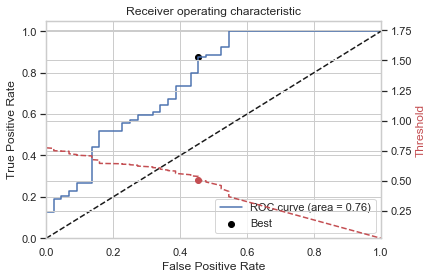

In [530]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_logreg = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_logreg))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [490]:
""" K-NEAREST NEIGHBORS """
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
KNN.fit(X_train1, y_t)
y_pred = KNN.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_knn = confusion_matrix(y_te, y_pred)
as_knn=accuracy_score(y_te, y_pred)

In [491]:
print(as_knn)

0.6585365853658537


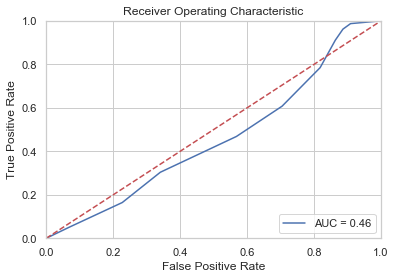

In [529]:
# calculate the fpr and tpr for all thresholds of the classification
probs = KNN.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_knn = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [493]:
"""Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
NaiveB = GaussianNB()
NaiveB.fit(X_train1, y_t)
y_pred1 = NaiveB.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_nb = confusion_matrix(y_te, y_pred1)
as_nb = accuracy_score(y_te, y_pred1)
print(cm_nb)
print(as_nb)

[[21 23]
 [ 1 78]]
0.8048780487804879


Best Threshold=0.643768, G-Mean=0.744


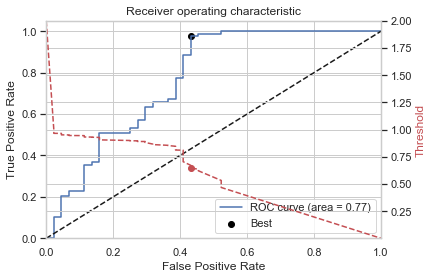

In [528]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = NaiveB.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_nb))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [495]:
""" SVM GAUSSIAN """
from sklearn.svm import SVC
SVCG = SVC(kernel = 'rbf', class_weight='balanced',random_state = 42, probability = True)
SVCG.fit(X_train1, y_t)
y_pred = SVCG.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_svm_gaussian = confusion_matrix(y_te, y_pred)
as_svm_gaussian = accuracy_score(y_te, y_pred)
print(as_svm_gaussian)

0.6504065040650406


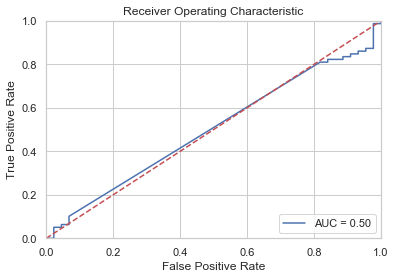

In [525]:
# calculate the fpr and tpr for all thresholds of the classification
probs = SVCG.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_svg = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [497]:
# """ SVM NO KERNEL """
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train1, y_t)
# y_pred = classifier.predict(X_test1)
# # Creating confusion matrix and calculating the accuracy score
# cm_svm_nokernel = confusion_matrix(y_te, y_pred)
# as_svm_nokernel = accuracy_score(y_te, y_pred)
# print(as_svm_nokernel)
""" SVM GAUSSIAN """
from sklearn.svm import SVC
SVCGI = SVC(kernel = 'rbf',random_state = 0, probability = True)
SVCGI.fit(X_train1, y_t)
y_pred = SVCGI.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_svm_gaussian1 = confusion_matrix(y_te, y_pred)
as_svm_gaussian1 = accuracy_score(y_te, y_pred)
print(as_svm_gaussian1)

0.6504065040650406


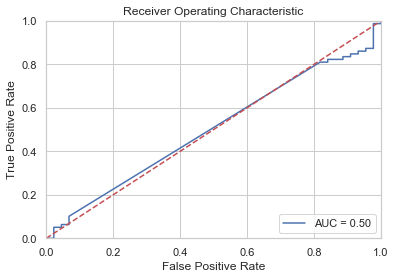

In [531]:
# calculate the fpr and tpr for all thresholds of the classification
probs = SVCGI.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [499]:
""" DECISION TREE CLASSIFICATION """
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTC.fit(X_train1, y_t)
y_pred = DTC.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_dtc = confusion_matrix(y_te, y_pred)
as_dtc = accuracy_score(y_te, y_pred)
print(as_dtc)

0.7154471544715447


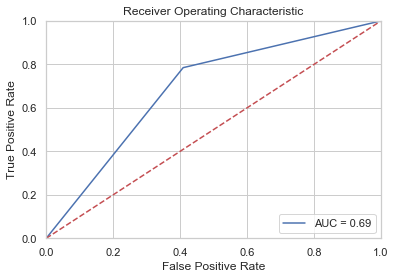

In [532]:
# calculate the fpr and tpr for all thresholds of the classification
probs = DTC.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_dt = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [501]:
#Random FOrest without grid search and random values

In [502]:
""" RANDOM FOREST CLASSIFIER """
from sklearn.ensemble import RandomForestClassifier
RanForest = RandomForestClassifier(n_estimators = 42, criterion = 'entropy', random_state = 42, max_depth = 3)
RanForest.fit(X_train1, y_t)
y_pred = RanForest.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_rfc = confusion_matrix(y_te, y_pred)
as_rfc = accuracy_score(y_te, y_pred)
print(as_rfc)

0.7967479674796748


In [503]:
# Random Forest with best estimator and max depth

In [504]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(X_train1,y_t)
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [522]:
""" RANDOM FOREST CLASSIFIER """
from sklearn.ensemble import RandomForestClassifier
RanForest = RandomForestClassifier(n_estimators = 141, criterion = 'entropy', random_state = 42, max_depth = 5)
RanForest.fit(X_train1, y_t)
y_pred = RanForest.predict(X_test1)
# Creating confusion matrix and calculating the accuracy score
cm_rfc = confusion_matrix(y_te, y_pred)
as_rfc = accuracy_score(y_te, y_pred)
print(as_rfc)

0.8130081300813008


Best Threshold=0.716557, G-Mean=0.731


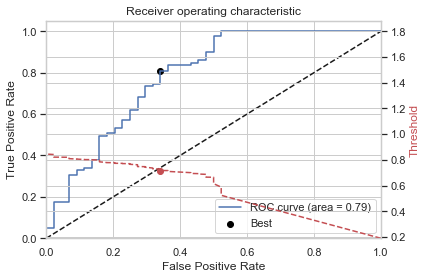

In [533]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = RanForest.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_rf))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [538]:
print(tpr)
print(fpr)
print(threshold)
print(gmeans)

[0.         0.01265823 0.05063291 0.05063291 0.17721519 0.17721519
 0.30379747 0.30379747 0.32911392 0.32911392 0.34177215 0.34177215
 0.37974684 0.37974684 0.49367089 0.49367089 0.50632911 0.50632911
 0.53164557 0.53164557 0.56962025 0.56962025 0.62025316 0.62025316
 0.6835443  0.6835443  0.73417722 0.73417722 0.74683544 0.74683544
 0.81012658 0.81012658 0.83544304 0.83544304 0.84810127 0.84810127
 0.86075949 0.86075949 0.89873418 0.89873418 0.97468354 0.97468354
 1.         1.        ]
[0.         0.         0.         0.02272727 0.02272727 0.06818182
 0.06818182 0.09090909 0.09090909 0.11363636 0.11363636 0.13636364
 0.13636364 0.15909091 0.15909091 0.18181818 0.18181818 0.20454545
 0.20454545 0.22727273 0.22727273 0.25       0.25       0.27272727
 0.27272727 0.29545455 0.29545455 0.31818182 0.31818182 0.34090909
 0.34090909 0.36363636 0.36363636 0.43181818 0.43181818 0.45454545
 0.45454545 0.47727273 0.47727273 0.5        0.5        0.52272727
 0.52272727 1.        ]
[1.88013382 0.

In [536]:
# Evaluating the best method to use in this loan prediction case
score={'auc_logreg':roc_auc_logreg, 'auc_knn':roc_auc_knn, 'auc_svm_gaussian':roc_auc_svg, 'auc_nb':roc_auc_nb, 'auc_dtc':roc_auc_dt, 'auc_rfc':roc_auc_rf}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best AUROC score in this case is {v} with accuracy score {u}")

auc_logreg=0.7580552359033372
auc_knn=0.4579976985040276
auc_svm_gaussian=0.5002876869965477
auc_nb=0.7686996547756042
auc_dtc=0.6878596087456845
auc_rfc=0.7850978135788262
The best AUROC score in this case is auc_rfc with accuracy score 0.7850978135788262


In [ ]:
# Evaluating the best method to use in this loan prediction case
score={'as_logreg':as_logreg, 'as_knn':as_knn, 'as_svm_gaussian':as_svm_gaussian, 'as_nb':as_nb, 'as_dtc':as_dtc, 'as_rfc':as_rfc}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best accuracy score in this case is {v} with accuracy score {u}")

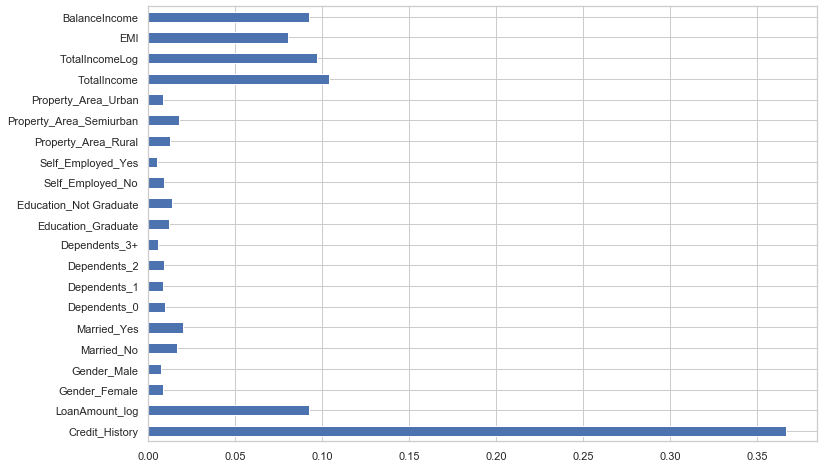

In [509]:
importances=pd.Series(RanForest.feature_importances_, index=X_train1.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [510]:
X_train1.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeLog,EMI,BalanceIncome
518,1.0,5.220356,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,6598.0,8.794522,0.513889,6084.111111
461,1.0,4.852030,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,7740.0,8.954157,0.711111,7028.888889
85,1.0,4.912655,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,4897.0,8.496378,0.377778,4519.222222
526,1.0,4.700480,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,3775.0,8.236156,0.305556,3469.444444
57,1.0,4.905275,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,5566.0,8.624432,0.375000,5191.000000


In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline

In [512]:
pipe = Pipeline(steps=[
    ('preprocess', StandardScaler()),
    ('classification', MLPClassifier())
])

In [513]:
random_state = 42
mlp_activation = ['identity', 'logistic', 'tanh', 'relu']
mlp_solver = ['lbfgs', 'sgd', 'adam']
mlp_max_iter = range(1000, 10000, 1000)
mlp_alpha = [1e-4, 1e-3, 0.01, 0.1, 1]
preprocess = [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [514]:
mlp_param_grid = [
    {
        'preprocess': preprocess,
        'classification__activation': mlp_activation,
        'classification__solver': mlp_solver,
        'classification__random_state': [random_state],
        'classification__max_iter': mlp_max_iter,
        'classification__alpha': mlp_alpha
    }
]

In [515]:
print(X_train1.shape, y_t.shape)

(491, 21) (491,)


In [516]:
print(X_test1.shape, y_te.shape)

(123, 21) (123,)


In [537]:
strat_k_fold = StratifiedKFold(
    n_splits=10,
    random_state=42
)

mlp_grid = GridSearchCV(
    pipe,
    param_grid=mlp_param_grid,
    cv=strat_k_fold,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

mlp_grid.fit(X_train1, y_t)

# Best MLPClassifier parameters
print(mlp_grid.best_params_)
# Best score for MLPClassifier with best parameters
print('\nBest F1 score for MLP: {:.2f}%'.format(mlp_grid.best_score_ * 100))

best_params = mlp_grid.best_params_

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2013 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2900 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3811 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4655 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5506 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6437 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 7450 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 8543 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 9718 tasks      | 

{'classification__activation': 'identity', 'classification__alpha': 1, 'classification__max_iter': 1000, 'classification__random_state': 42, 'classification__solver': 'sgd', 'preprocess': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)}

Best F1 score for MLP: 88.06%


In [539]:
scaler = RobustScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train1)
X_test_scaler = scaler.transform(X_test1)

mlp = MLPClassifier(
    max_iter=1000,
    alpha=1,
    activation='identity',
    solver='sgd',
    random_state=42
)
mlp.fit(X_train_scaler, y_t)

mlp_predict = mlp.predict(X_test_scaler)
mlp_predict_proba = mlp.predict_proba(X_test_scaler)[:, 1]

print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))
print('MLP AUC: {:.2f}%'.format(roc_auc_score(y_test, mlp_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, mlp_predict))
print('MLP Training set score: {:.2f}%'.format(mlp.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(mlp.score(X_test_scaler, y_test) * 100))


Data preprocessing with RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

MLP Accuracy: 79.67%
MLP AUC: 77.76%
MLP Classification report:

               precision    recall  f1-score   support

           0       1.00      0.43      0.60        44
           1       0.76      1.00      0.86        79

    accuracy                           0.80       123
   macro avg       0.88      0.72      0.73       123
weighted avg       0.85      0.80      0.77       123

MLP Training set score: 81.26%
MLP Testing set score: 79.67%


Best Threshold=0.748083, G-Mean=0.700


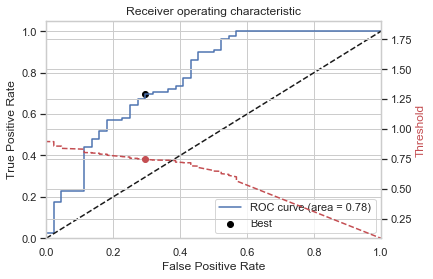

In [540]:
fpr, tpr, threshold = metrics.roc_curve(y_te, mlp_predict_proba)
roc_auc = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()